<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Метод опорных векторов

Метод опорных векторов (Support Vector Machine, SVM) — это один из самых мощных алгоритмов машинного обучения с учителем, готовых к использованию "из коробки". В отличие от многих других алгоритмов, таких как нейронные сети, для получения хороших результатов с SVM не требуется много изменений и настроек. Я потратил значительное время на изучение статей, блогов и материалов в интернете, пытаясь понять суть этого высокоэффективного алгоритма, и обнаружил, что большинство доступных руководств дают лишь общий обзор SVM, не объясняя математическую подоплёку, рассматривая её как "чёрный ящик". После прочтения таких статей я часто оставался в замешательстве. В чём именно заключается задача, которую решает SVM? Как найти оптимальную гиперплоскость? Как SVM справляется с нелинейно разделимыми данными? Почему используются ядра? Чтобы полностью понять ответы на эти вопросы, необходимо углубиться в математическую составляющую SVM и разобраться, как он работает.

В этой лекукции я сосредоточусь на математической части SVM, и для этого вам потребуется хотя бы базовое знание линейной алгебры и теории оптимизации.

### Определения
Прежде чем перейти к алгоритму SVM, давайте рассмотрим несколько определений, которые нам понадобятся далее.

#### Длина вектора
Длина вектора $\mathbf{x}$ называется его нормой, и обозначается как $||\mathbf{x}||$. Евклидова норма для вектора $\mathbf{x} = (x_1, x_2, \dots, x_n)$ вычисляется по формуле:

$$
||\mathbf{x}|| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
$$

#### Направление вектора
Направление вектора $\mathbf{x} = (x_1, x_2)$ обозначается как $\mathbf{w}$ и определяется следующим образом:

$$
\mathbf{w} = \left( \frac{x_1}{||\mathbf{x}||}, \frac{x_2}{||\mathbf{x}||} \right)
$$

Если посмотреть на рисунок 1, можно увидеть, что $\cos(\theta) = \frac{x_1}{||\mathbf{x}||}$ и $\cos(\alpha) = \frac{x_2}{||\mathbf{x}||}$. Таким образом, вектор направления $\mathbf{w}$ также можно записать как:

$$
\mathbf{w} = (\cos(\theta), \cos(\alpha))
$$

Следует отметить, что норма вектора направления всегда равна 1. Поэтому вектор направления $\mathbf{w}$ также называется единичным вектором.


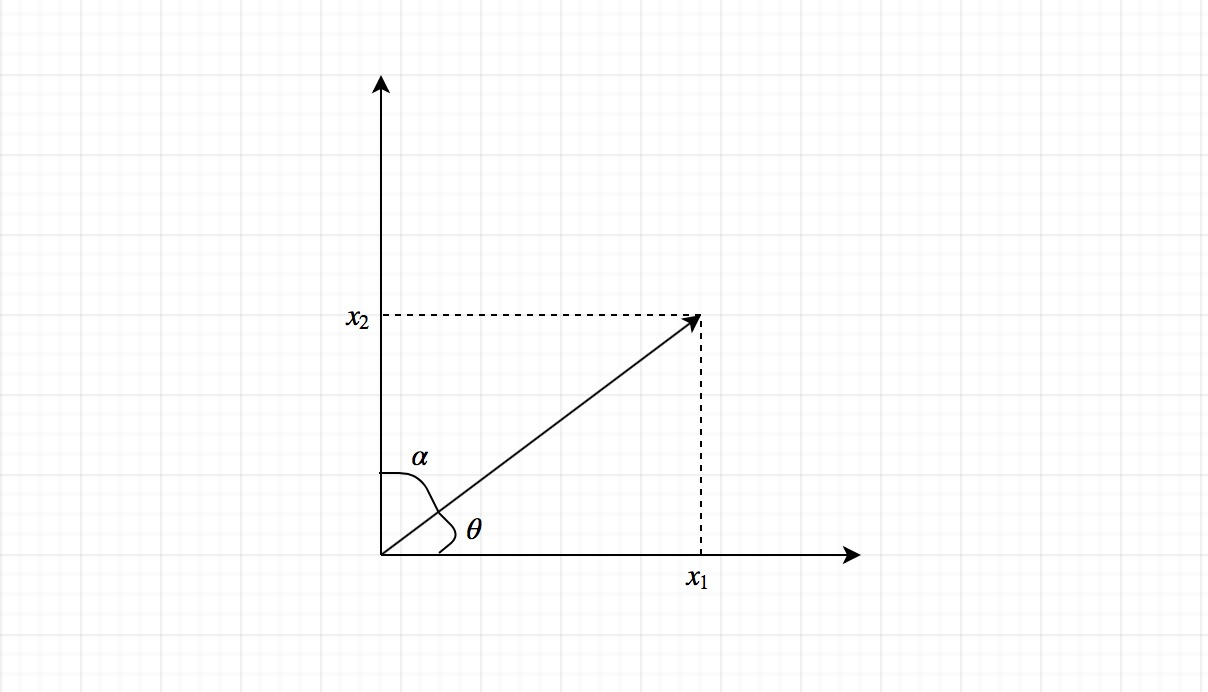


#### Скалярное произведение
Скалярное произведение двух векторов возвращает скалярное значение и даёт нам представление о том, как связаны два вектора.

На рисунке 2 показаны два вектора $\mathbf{x}$ и $\mathbf{y}$, а также угол $\theta$ между ними. Геометрическая формула скалярного произведения определяется как:

$$
\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \, ||\mathbf{y}|| \, \cos(\theta)
$$



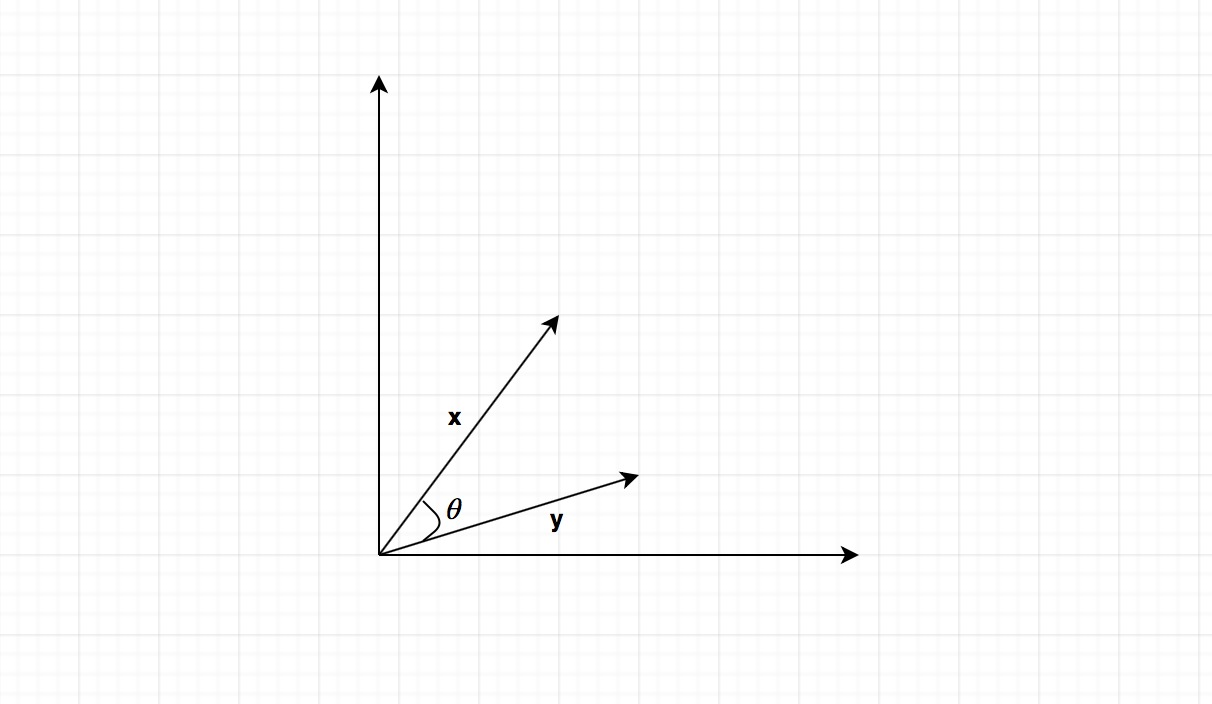


Рассмотрев рисунок 3, можно увидеть, что $\theta = \beta - \alpha$. Тогда получаем:

$$
\cos(\theta) = \cos(\beta - \alpha) = \cos(\beta)\cos(\alpha) + \sin(\beta)\sin(\alpha) = \frac{x_1}{||\mathbf{x}||} \cdot \frac{y_1}{||\mathbf{y}||} + \frac{x_2}{||\mathbf{x}||} \cdot \frac{y_2}{||\mathbf{y}||}
$$




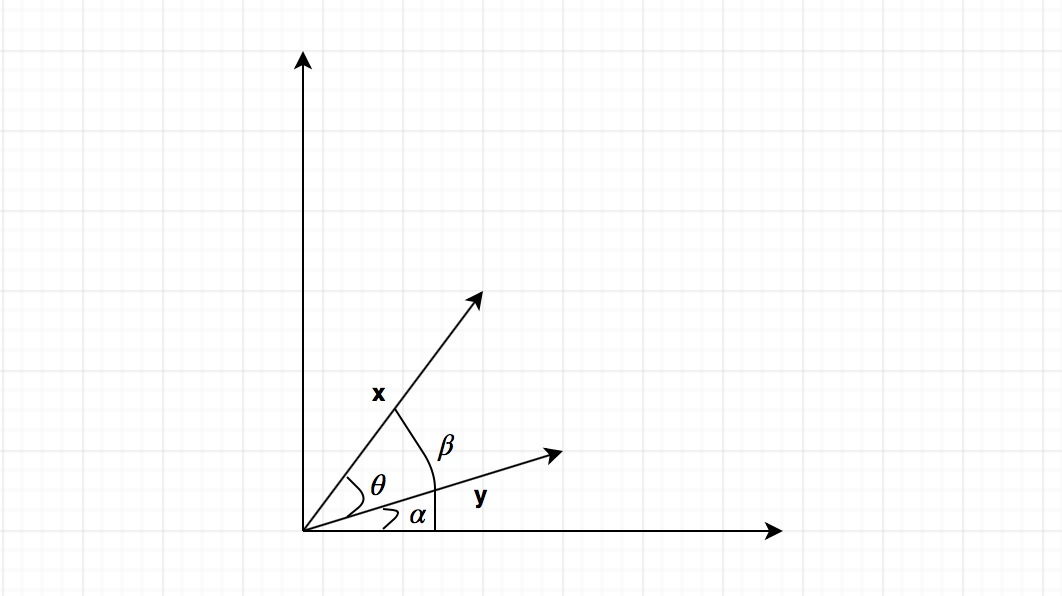

Подставив это в геометрическую формулу скалярного произведения, получаем:

$$
\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \, ||\mathbf{y}|| \cdot \frac{x_1 y_1 + x_2 y_2}{||\mathbf{x}|| \, ||\mathbf{y}||} = x_1 y_1 + x_2 y_2
$$

Это алгебраическая формула скалярного произведения. В общем случае, для двух n-мерных векторов, скалярное произведение можно вычислить по следующей формуле:

$$
\mathbf{x} \cdot \mathbf{y} = \sum_{i=1}^{n} x_i y_i
$$

Таким образом, эти основные математические понятия помогут нам лучше понять, как работает метод опорных векторов и какие задачи он решает.


Линейная разделимость

Линейная разделимость — это ключевое понятие в методе опорных векторов (SVM). Хотя на практике данные часто не являются линейно разделимыми, начнем с рассмотрения случаев линейной разделимости, так как они проще для понимания. В дальнейшем это позволит нам разобраться с нелинейной разделимостью.

На рисунке 4 показаны двумерные данные, разделенные прямой линией. В этом случае мы говорим, что данные линейно разделимы. На рисунке 5 показан пример нелинейно разделимых данных, где невозможно найти линию, которая бы разделила двумерные данные. Аналогично, для трёхмерных данных мы говорим, что они линейно разделимы, если можно найти плоскость, которая их разделяет.


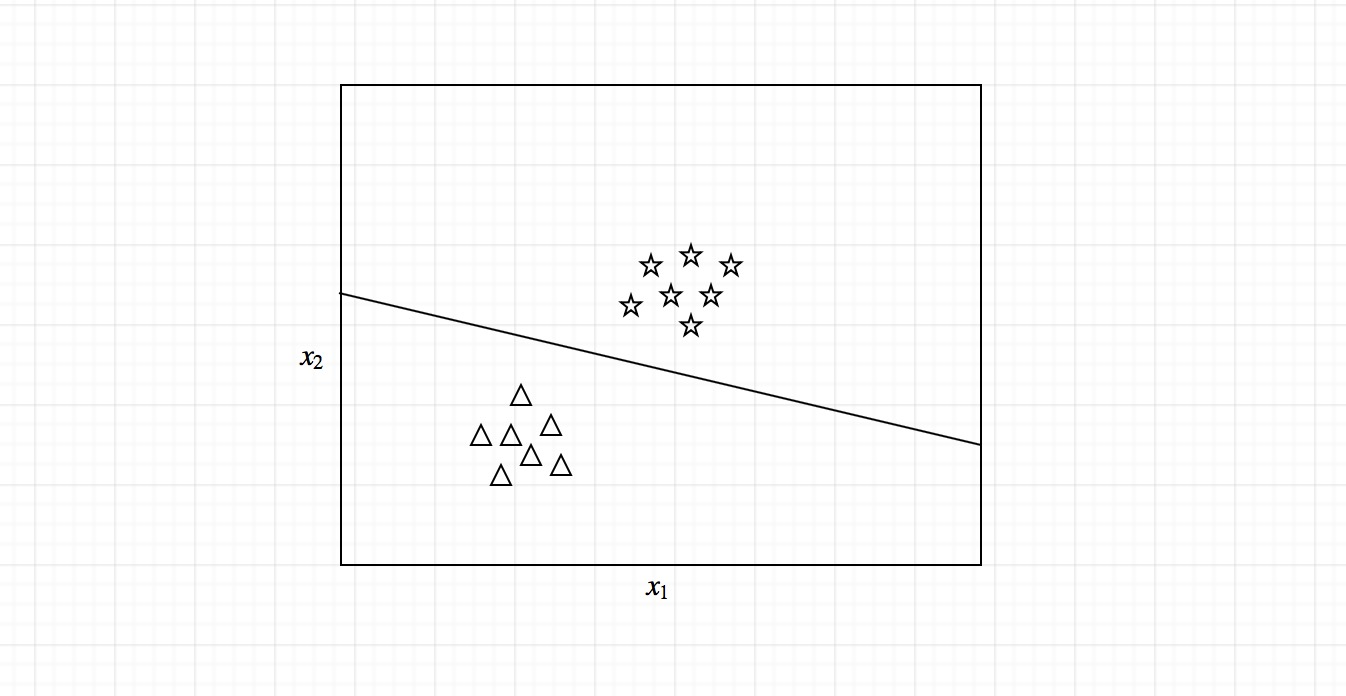

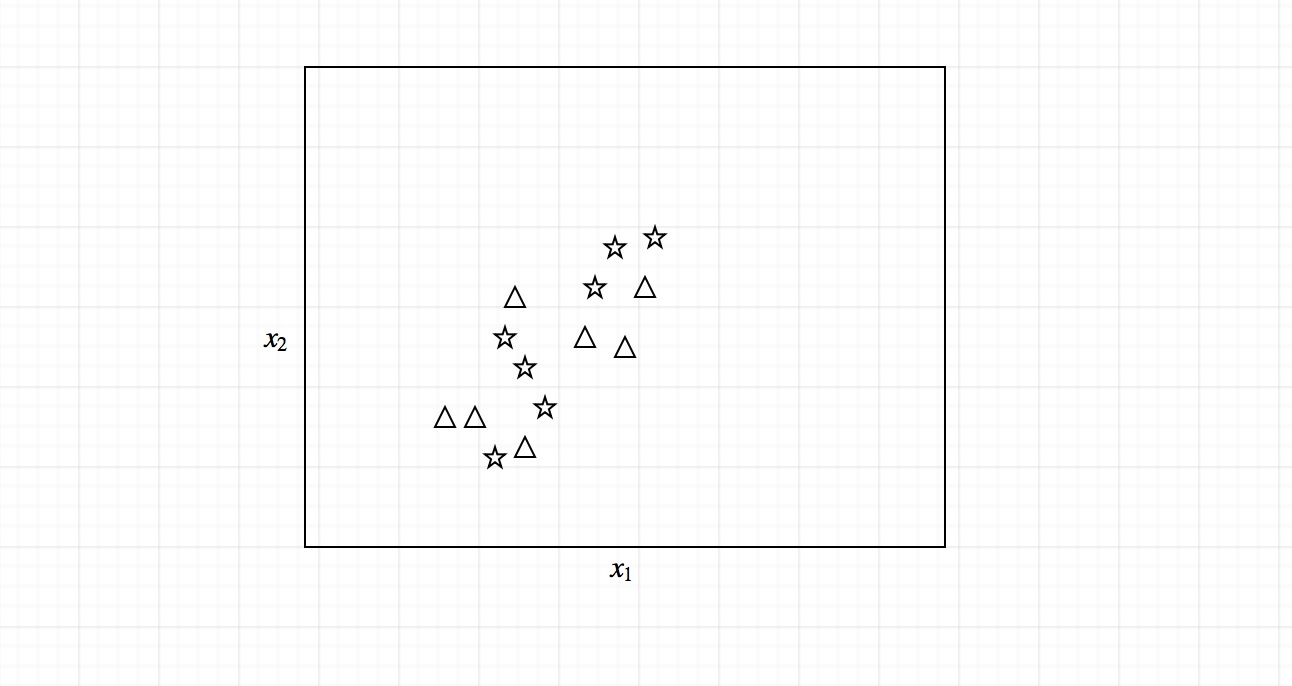


**Гиперплоскость**

Когда данных больше трёх измерений, встаёт вопрос, как разделить многомерные данные? Для этого используется гиперплоскость. Что такое гиперплоскость?

Рассмотрим двумерный случай. Двумерные линейно разделимые данные могут быть разделены прямой линией, уравнение которой имеет вид: $y = ax + b$. Если переименовать $x$ в $x_1$, а $y$ в $x_2$, то получим:

$$ ax_1 - x_2 + b = 0 $$

Если определить $x = (x_1, x_2)$, а $w = (a, -1)$, то уравнение преобразуется в:

$$ w \cdot x + b = 0 $$

Это уравнение можно обобщить для любого количества измерений, получив уравнение гиперплоскости.

**Классификатор**

После того как гиперплоскость найдена, её можно использовать для прогнозирования. Гипотеза будет выглядеть так:

$$
h(x_i) = \begin{cases}
+1, & \text{если } w \cdot x + b \geq 0 \\
-1, & \text{если } w \cdot x + b < 0
\end{cases}
$$

Точка, находящаяся выше или на гиперплоскости, будет классифицирована как $+1$, а точка ниже гиперплоскости — как $-1$.

Таким образом, цель алгоритма SVM заключается в нахождении гиперплоскости, которая наиболее точно разделяет данные. Хотя может существовать несколько таких гиперплоскостей, мы стремимся найти оптимальную гиперплоскость.




##Оптимизация задачи SVM

Если вы знакомы с персептроном, то знаете, что он находит гиперплоскость, итеративно обновляя веса и пытаясь минимизировать целевую функцию. Однако, если запустить алгоритм несколько раз, каждый раз можно получить разную гиперплоскость. SVM (метод опорных векторов) не страдает от этой проблемы. Он работает, находя оптимальную гиперплоскость, которая лучше всего разделяет данные.

Возникает вопрос: как выбрать оптимальную гиперплоскость и как сравнивать гиперплоскости?

### Метрики для сравнения гиперплоскостей

#### Первая версия
Рассмотрим уравнение гиперплоскости: $w \cdot x + b = 0$. Известно, что если точка $(x, y)$ лежит на гиперплоскости, то $w \cdot x + b = 0$. Если точка $(x, y)$ не на гиперплоскости, значение $w \cdot x + b$ может быть положительным или отрицательным. Для всех обучающих примеров мы хотим найти точку, ближайшую к гиперплоскости. Можно вычислить $\beta = |w \cdot x + b|$. Чтобы формально описать задачу:

Дан набор данных $D = \{(x_i, y_i) | x_i \in \mathbb{R}^n, y_i \in \{-1, 1\} \}_{i=1}^m$, мы вычисляем $\beta$ для каждого обучающего примера, и $B$ — это наименьшее значение $\beta$, которое мы получаем:

$$ B = \min_{i=1...m} |w \cdot x + b| $$

Если у нас есть несколько гиперплоскостей, каждая из них будет иметь значение $B_i$, и мы выберем гиперплоскость с наибольшим $B_i$:

$$ H = \max_{i=1...s} \{h_i | B_i\} $$

Однако, эта метрика не всегда позволяет различить хорошую и плохую гиперплоскость. Поскольку мы берем абсолютное значение $w \cdot x + b$, можно получить одинаковые значения для корректной и некорректной гиперплоскости. Необходимо доработать эту метрику.

#### Вторая версия
Можно использовать информацию о метке $y$. Определим $f = y(w \cdot x + b)$. Знак $f$ всегда будет положительным, если точка классифицирована правильно, и отрицательным, если классифицирована неверно.

Формально, для набора данных $D$ мы вычисляем $f$ для каждого примера, и $F$ — это наименьшее $f$, которое мы получаем. В литературе $F$ называется функциональным зазором набора данных:

$$ F = \min_{i=1...m} y_i(w \cdot x + b) $$

При сравнении гиперплоскостей гиперплоскость с наибольшим $F$ будет выбрана.

Кажется, что это правильная метрика, однако она страдает от проблемы масштабируемости. Например, если у нас есть два вектора $w_1 = (3, 4)$ и $w_2 = (30, 40)$, они будут представлять одну и ту же гиперплоскость, так как у них одинаковый единичный вектор $u = (0.6, 0.8)$. Но при вычислении $F$, гиперплоскость с $w_2$ даст большее значение, чем гиперплоскость с $w_1$. Нам нужна масштабно-инвариантная метрика.

#### Третья версия
Мы делим $f$ на длину вектора $w$. Определим $\gamma = \frac{y(w \cdot x + b)}{\|w\|}$.

Формально, для набора данных $D$ мы вычисляем $\gamma$ для каждого примера, и $M$ — это наименьшее $\gamma$, которое мы получаем. В литературе $M$ называется геометрическим зазором набора данных:

$$ M = \min_{i=1...m} \frac{y_i(w \cdot x + b)}{\|w\|} $$

При сравнении гиперплоскостей гиперплоскость с наибольшим $M$ будет выбрана.

Теперь у нас есть идеальная метрика для сравнения гиперплоскостей. Наша цель — найти оптимальную гиперплоскость, что означает необходимость найти значения $w$ и $b$ для оптимальной гиперплоскости.

### Постановка задачи оптимизации SVM
Чтобы найти значения $w$ и $b$ для оптимальной гиперплоскости, необходимо решить следующую задачу оптимизации с условием, что геометрический зазор для каждого примера должен быть больше или равен $M$:

$$
\max_{w,b} M, \quad \text{при условии} \ \gamma_i \geq M, \ i=1...m
$$

Так как $M = \frac{F}{\|w\|}$, задачу можно переписать следующим образом:

$$
\max_{w,b} \frac{F}{\|w\|}, \quad \text{при условии} \ f_i \geq F, \ i=1...m
$$

Если мы перескалируем $w$ и $b$, мы все равно будем максимизировать $M$, и результат оптимизации не изменится. Сделаем перескалирование таким образом, чтобы $F = 1$. Тогда задача будет выглядеть так:

$$
\max_{w,b} \frac{1}{\|w\|}, \quad \text{при условии} \ f_i \geq 1, \ i=1...m
$$

Эта задача максимизации эквивалентна следующей задаче минимизации:

$$
\min_{w,b} \|w\|, \quad \text{при условии} \ f_i \geq 1, \ i=1...m
$$

Эта задача минимизации эквивалентна следующей:

$$
\min_{w,b} \frac{1}{2} \|w\|^2, \quad \text{при условии} \ y_i(w \cdot x + b) - 1 \geq 0, \ i=1...m
$$

Это и есть задача оптимизации для SVM. Она называется задачей выпуклой квадратичной оптимизации. Мы обсудим, как решать эту задачу в следующем разделе.




## Решение задачи оптимизации SVM – Жесткий край SVM

Мы можем переформулировать задачу оптимизации SVM с использованием метода множителей Лагранжа.

### Проблема Лагранжа для SVM

Лагранж утверждал, что если мы хотим найти минимум функции $f$ при условии равенства $g$, нам нужно решить уравнение:

$$
\nabla f(x) - \alpha \nabla g(x) = 0
$$

где $\alpha$ называется множителем Лагранжа.

В терминах задачи оптимизации SVM, $f(w) = \frac{1}{2} \|w\|^2$, а $g(w,b) = y_i (w \cdot x + b) - 1, \, i = 1, \ldots, m$. Тогда лагранжева функция записывается как:

$$
L(w,b,\alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{m} \alpha_i [y_i (w \cdot x + b) - 1].
$$

Чтобы аналитически решить уравнение $\nabla L(w,b,\alpha) = 0$, количество примеров должно быть небольшим. Поэтому мы перепишем задачу, используя принцип двойственности.

Альтернативно, нам нужно решить следующую задачу лагранжевой первичной формы:

$$
\min_{w,b} \max_{\alpha} L(w,b,\alpha) \quad \text{при условии} \quad \alpha_i \geq 0, \, i = 1, \ldots, m.
$$

Точнее, $\alpha$ должны быть множителями ККТ (Караша-Куна-Таккера), поскольку мы имеем дело с неравенствами. Но для удобства мы будем использовать термин "множители Лагранжа".

Существует $\alpha$ для каждого примера, и нам нужно максимизировать $L(w,b,\alpha)$ для всех примеров. И существует пара $(w,b)$ для каждой гиперплоскости, нам нужно минимизировать $\max L(w,b,\alpha)$ одновременно.



##Решение двойственной задачи Вульфа

Мы можем решить двойственную задачу Вульфа аналитически, используя сторонние библиотеки или пакеты. Например, можно воспользоваться Python-библиотекой CVXOPT, которая предназначена для задач выпуклой оптимизации. Этот пакет предоставляет решатель для задач квадратичного программирования (QP). Мы можем преобразовать нашу двойственную задачу, указать необходимые параметры, передать их решателю и получить ожидаемое решение. В решении будут содержаться значения множителей Лагранжа для каждого примера. После этого мы можем вычислить $w$ и $b$, чтобы найти оптимальную гиперплоскость. Я не буду приводить код, так как это выходит за рамки данной статьи, но вы можете легко реализовать это самостоятельно.

На практике большинство библиотек машинного обучения используют алгоритм, специально разработанный для быстрого решения этой задачи: алгоритм последовательной минимальной оптимизации (SMO). В отличие от решателя CVXOPT для квадратичного программирования, SMO решает более простую задачу и работает значительно быстрее. Детали SMO я здесь не привожу, но вы можете найти много материалов онлайн, чтобы изучить этот алгоритм подробнее.

В отличие от перцептронов, многократный запуск метода опорных векторов (SVM) всегда возвращает одно и то же решение.

**SVM с жестким зазором**

Приведённая выше формулировка SVM называется SVM с жестким зазором. Проблема с таким подходом заключается в том, что он не допускает выбросов в данных. Этот метод не работает с неразделимыми данными из-за наличия выбросов. Если вспомнить нашу исходную задачу оптимизации, то ограничение имеет вид $y_i(w \cdot x_i + b) \geq 1$ для каждого примера. Для того чтобы задача оптимизации была разрешимой, все ограничения должны быть выполнены. Если существует выброс, который делает выполнение ограничения невозможным, то задача не будет иметь решения. В следующем разделе мы обсудим, как решить эту проблему с помощью варианта, называемого SVM с мягким зазором.

**Решение задачи оптимизации SVM — SVM с мягким зазором**

Проблема SVM с жестким зазором заключается в том, что он работает только с линейно разделимыми данными. Однако в реальных задачах это встречается редко. Чаще всего данные содержат шум и могут быть неразделимыми линейно. Рассмотрим, как SVM с мягким зазором справляется с этой проблемой.

По сути, метод SVM с мягким зазором использует простой трюк — он добавляет переменные невязки $\zeta_i$ к ограничениям задачи оптимизации. Теперь ограничения принимают вид:

$$ y_i(w \cdot x_i + b) \geq 1 - \zeta_i, \quad i = 1, \dots, m $$

Добавляя переменные невязки, при минимизации целевой функции становится возможным удовлетворить ограничение, даже если пример не соответствует исходному ограничению. Однако проблема заключается в том, что всегда можно выбрать достаточно большое значение $\zeta$, чтобы все примеры удовлетворяли ограничениям.

Один из способов решения этой проблемы — использование регуляризации. Например, можно использовать $L_1$-регуляризацию, чтобы штрафовать за большие значения $\zeta$. Регуляризованная задача оптимизации принимает вид:

$$
\min_{w, b, \zeta} \frac{1}{2} ||w||^2 + \sum_{i=1}^{m} \zeta_i
$$

при условии $y_i(w \cdot x_i + b) \geq 1 - \zeta_i, \quad i = 1, \dots, m$.

Также важно убедиться, что мы не минимизируем целевую функцию, выбирая отрицательные значения $\zeta$. Для этого добавляются ограничения $\zeta_i \geq 0$. Дополнительно мы вводим регуляризационный параметр $C$, чтобы определить, насколько важны значения $\zeta$, что означает, насколько мы хотим избегать ошибочной классификации каждого примера. Регуляризованная задача принимает следующий вид:

$$
\min_{w, b, \zeta} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} \zeta_i
$$

при условии $y_i(w \cdot x_i + b) \geq 1 - \zeta_i, \quad \zeta_i \geq 0, \quad i = 1, \dots, m$.

Опять же, если мы используем метод множителей Лагранжа, как было показано ранее, и проделаем всю сложную математику, задача оптимизации может быть преобразована в двойственную задачу:

$$
\max_{\alpha} \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_i \alpha_j y_i y_j x_i \cdot x_j
$$

при условиях $0 \leq \alpha_i \leq C, \quad i = 1, \dots, m$, и $\sum_{i=1}^{m} \alpha_i y_i = 0$.

Здесь ограничение $\alpha_i \geq 0$ заменено на $0 \leq \alpha_i \leq C$.

**Регуляризационный параметр C**

Итак, что делает регуляризационный параметр $C$? Как было сказано ранее, он определяет, насколько важны значения $\zeta$. Меньшие значения $C$ придают больший вес $\zeta$, а большие значения $C$ уменьшают их значимость.

Другими словами, параметр $C$ даёт возможность контролировать, как SVM будет обрабатывать ошибки. Если задать $C$, стремящийся к бесконечности, мы получим тот же результат, что и для SVM с жестким зазором. Напротив, если установить $C = 0$, не будет никаких ограничений, и мы получим гиперплоскость, которая не будет классифицировать данные. В общем случае: малые значения $C$ приводят к более широкому зазору за счёт некоторых ошибок классификации, а большие значения $C$ дают SVM с жёстким зазором и не допускают нарушений ограничений. Нам необходимо найти значение $C$, которое обеспечит решение, не подверженное влиянию шума в данных.



##Метод ядра (Kernel trick)  
Теперь SVM с мягким зазором (Soft Margin SVM) может работать с данными, которые нелинейно разделимы из-за шумов. Но что, если нелинейная разделимость вызвана не шумом? Что, если данные по своей природе нелинейно разделимы? Можно ли в таком случае всё ещё использовать SVM для их разделения? Ответ — да. И для этого существует техника, называемая «метод ядра».

Представьте себе двумерные данные, которые нелинейно разделимы, и вы хотите их классифицировать с помощью SVM. На первый взгляд это невозможно, так как данные не разделимы линейно. Однако, если мы преобразуем эти двумерные данные в пространство более высокой размерности, например, в трёхмерное или даже в десятиразмерное, мы сможем найти гиперплоскость для их разделения.

Проблема заключается в том, что для больших наборов данных, содержащих, скажем, миллионы примеров, такое преобразование будет занимать очень много времени, не говоря уже о сложных вычислениях в процессе оптимизации. Давайте вспомним двойственную задачу Вульфа:

$$
\max_{\alpha} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j x_i \cdot x_j
$$
при условии, что $\alpha_i \geq 0, i=1...m, \sum_{i=1}^m \alpha_i y_i = 0$.

Чтобы решить эту задачу, на самом деле нас интересует только результат скалярного произведения $x_i \cdot x_j$. Если бы существовала функция, которая могла бы вычислять скалярное произведение так же, как если бы мы преобразовали данные в пространство более высокой размерности, это было бы потрясающе. Такая функция называется **ядерной функцией**.

Итак, метод ядра заключается в следующем: если вы определяете ядерную функцию как $K(x_i, x_j) = x_i \cdot x_j$, то мы переписываем двойственную задачу Вульфа так:

$$
\max_{\alpha} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$
при условии, что $\alpha_i \geq 0, i=1...m, \sum_{i=1}^m \alpha_i y_i = 0$.

Это небольшое изменение, но на самом деле это мощный приём. Он позволяет вычислять результат скалярного произведения в другом пространстве. Теперь у нас есть возможность изменять ядерную функцию, чтобы классифицировать данные, которые нелинейно разделимы.

Существует несколько типов ядерных функций, которые можно использовать для классификации данных. Некоторые из самых популярных — это линейное ядро, полиномиальное ядро и ядро RBF.

- **Линейное ядро** определяется как:  
  $$
  K(x_i, x_j) = x_i \cdot x_j
  $$
  Это то же самое, что мы использовали в приведённой выше задаче. На практике линейное ядро хорошо работает для задач классификации текстов.

- **Полиномиальное ядро** определяется как:  
  $$
  K(x_i, x_j) = (x_i \cdot x_j + c)^d
  $$
  Здесь $c$ — константа, а $d$ — степень полинома. Когда $d = 1$, это просто линейное ядро. Большие значения $d$ делают границу разделения более сложной и могут привести к переобучению.

- **Ядро RBF** (радиально-базисное) определяется как:  
  $$
  K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
  $$
  Это ядро также называют **гауссовым ядром**. Оно приводит к более сложной границе разделения. Параметр $\gamma$ контролирует влияние векторов поддержки. Малое значение $\gamma$ делает модель похожей на линейный SVM, в то время как большое значение $\gamma$ делает модель более чувствительной к примерам векторов поддержки.

На практике рекомендуется начинать с ядра RBF, так как оно обычно показывает хорошие результаты.


## 1. Реализация SVM с нуля:

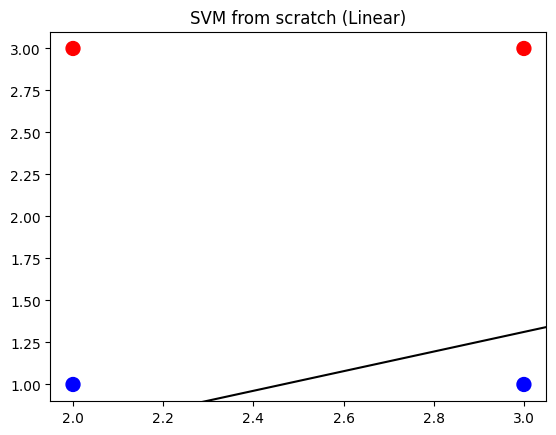

Вектор весов: [-0.71889219  1.23075295]
Сдвиг: 0.5410000000000004


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные (точки и метки классов)
X = np.array([[2, 3], [3, 3], [2, 1], [3, 1]])
y = np.array([1, 1, -1, -1])

# Параметры SVM
class SimpleSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param  # Регуляризация
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Обучим модель на данных
svm = SimpleSVM()
svm.fit(X, y)

# Функция для визуализации разделяющей гиперплоскости и данных
def visualize_svm(X, y, svm):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100)

    # Нарисуем гиперплоскость
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = -(svm.w[0] * xx + svm.b) / svm.w[1]
    plt.plot(xx, yy, 'k-')

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('SVM from scratch (Linear)')
    plt.show()

# Визуализируем
visualize_svm(X, y, svm)

# Выводим параметры
print("Вектор весов:", svm.w)
print("Сдвиг:", svm.b)

## Реализация с использованием scikit-learn:

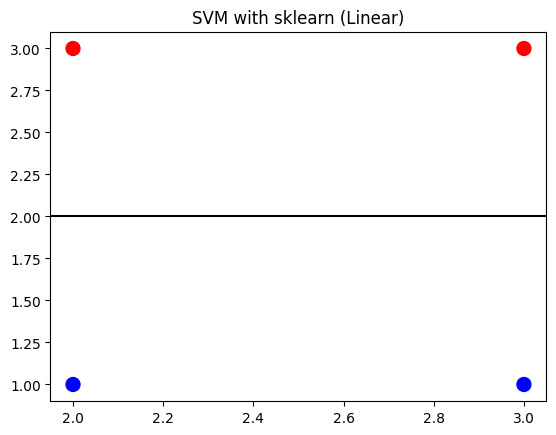

Вектор весов (sklearn): [0. 1.]
Сдвиг (sklearn): -2.0


In [ ]:
from sklearn import svm as skl_svm
import numpy as np
import matplotlib.pyplot as plt

# Данные (те же самые)
X = np.array([[2, 3], [3, 3], [2, 1], [3, 1]])
y = np.array([1, 1, -1, -1])

# Обучим модель SVM с использованием линейного ядра
clf = skl_svm.SVC(kernel='linear')
clf.fit(X, y)

# Функция для визуализации разделяющей гиперплоскости и данных
def visualize_svm_sklearn(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100)

    # Нарисуем гиперплоскость
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = -(clf.coef_[0][0] * xx + clf.intercept_[0]) / clf.coef_[0][1]
    plt.plot(xx, yy, 'k-')

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('SVM with sklearn (Linear)')
    plt.show()

# Визуализируем
visualize_svm_sklearn(X, y, clf)

# Выводим параметры
w = clf.coef_[0]
b = clf.intercept_[0]
print("Вектор весов (sklearn):", w)
print("Сдвиг (sklearn):", b)

### Метод опорных векторов для задачи регрессии (SVR)

Метод опорных векторов может быть адаптирован для решения задач регрессии. Этот метод называется **Support Vector Regression (SVR)**. Основная идея SVR заключается в том, чтобы найти функцию, которая отклоняется от истинных значений не более чем на заданную величину $\varepsilon$, при этом минимизируя норму вектора весов $w$. В отличие от классификации, где SVM стремится максимизировать зазор между классами, в SVR цель — минимизировать ошибку предсказания, сохраняя при этом простоту модели.



### Математическая постановка задачи SVR

#### Функция регрессии
Функция регрессии в SVR задаётся в виде:

$$
f(x) = w \cdot x + b,
$$

где:
- $w$ — вектор весов,
- $b$ — смещение (bias).

#### Цель SVR
SVR стремится минимизировать ошибку предсказания, при этом допуская отклонения от истинных значений не более чем на $\varepsilon$. Это достигается за счёт введения **$\varepsilon$-трубки** (epsilon-tube), внутри которой ошибка не штрафуется.

#### Задача оптимизации
Задача оптимизации для SVR формулируется следующим образом:

$$
\min_{w, b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} (\zeta_i + \zeta_i^*),
$$

при условиях:

$$
y_i - (w \cdot x_i + b) \leq \varepsilon + \zeta_i,
$$

$$
(w \cdot x_i + b) - y_i \leq \varepsilon + \zeta_i^*,
$$

$$
\zeta_i, \zeta_i^* \geq 0, \quad i = 1, \dots, m.
$$

Здесь:
- $\zeta_i$ и $\zeta_i^*$ — переменные невязки, которые позволяют учитывать ошибки за пределами $\varepsilon$-трубки,
- $C$ — регуляризационный параметр, который контролирует компромисс между минимизацией ошибки и простотой модели.



### Решение задачи оптимизации SVR

#### Метод множителей Лагранжа
Как и в случае классификации, задача оптимизации SVR решается с использованием метода множителей Лагранжа. Лагранжиан для SVR записывается как:

$$
L(w, b, \zeta, \zeta^*, \alpha, \alpha^*, \eta, \eta^*) = \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} (\zeta_i + \zeta_i^*) - \sum_{i=1}^{m} \alpha_i (\varepsilon + \zeta_i - y_i + w \cdot x_i + b) - \sum_{i=1}^{m} \alpha_i^* (\varepsilon + \zeta_i^* + y_i - w \cdot x_i - b) - \sum_{i=1}^{m} (\eta_i \zeta_i + \eta_i^* \zeta_i^*),
$$

где $\alpha_i, \alpha_i^*, \eta_i, \eta_i^*$ — множители Лагранжа.

#### Двойственная задача
Двойственная задача для SVR формулируется как:

$$
\max_{\alpha, \alpha^*} \sum_{i=1}^{m} y_i (\alpha_i - \alpha_i^*) - \varepsilon \sum_{i=1}^{m} (\alpha_i + \alpha_i^*) - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} (\alpha_i - \alpha_i^*) (\alpha_j - \alpha_j^*) (x_i \cdot x_j),
$$

при условиях:

$$
0 \leq \alpha_i, \alpha_i^* \leq C, \quad i = 1, \dots, m,
$$

$$
\sum_{i=1}^{m} (\alpha_i - \alpha_i^*) = 0.
$$

Решение двойственной задачи позволяет найти множители Лагранжа $\alpha_i$ и $\alpha_i^*$, которые используются для вычисления вектора $w$ и смещения $b$.



### Использование ядер в SVR

Как и в случае классификации, SVR может использовать ядерные функции для работы с нелинейными данными. Ядро позволяет преобразовать данные в пространство более высокой размерности, где они становятся линейно разделимыми.

#### Ядерные функции для SVR
1. **Линейное ядро**:
   $$
   K(x_i, x_j) = x_i \cdot x_j.
   $$
2. **Полиномиальное ядро**:
   $$
   K(x_i, x_j) = (x_i \cdot x_j + c)^d.
   $$
3. **Радиально-базисное ядро (RBF)**:
   $$
   K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2).
   $$

#### Преимущества использования ядер
- Позволяет моделировать сложные нелинейные зависимости.
- Упрощает вычисления, так как не требует явного преобразования данных.



### Практические аспекты SVR

1. **Выбор параметра $\varepsilon$**:
   - Малые значения $\varepsilon$ делают модель более чувствительной к ошибкам.
   - Большие значения $\varepsilon$ позволяют модели быть более устойчивой к шуму.

2. **Регуляризационный параметр $C$**:
   - Малые значения $C$ увеличивают зазор, допуская больше ошибок.
   - Большие значения $C$ уменьшают зазор, минимизируя ошибки.

3. **Выбор ядра**:
   - Линейное ядро подходит для линейных зависимостей.
   - RBF ядро является универсальным и часто показывает хорошие результаты для нелинейных данных.



### Пример использования SVR




Рассмотрим пример использования SVR для задачи регрессии на языке Python с использованием библиотеки `scikit-learn`:

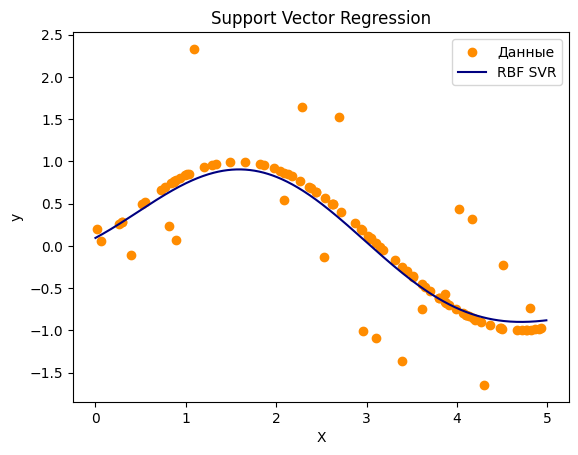

In [1]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Добавление шума
y[::5] += 3 * (0.5 - np.random.rand(20))

# Обучение модели SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X, y)

# Предсказание
X_test = np.arange(0, 5, 0.01)[:, np.newaxis]
y_rbf = svr_rbf.predict(X_test)

# Визуализация
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_rbf, color='navy', label='RBF SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Вопросы для самопроверки:

1. Что такое метод опорных векторов (SVM) и в чем его основная цель?
2. Как определяется гиперплоскость в пространстве признаков для SVM?
3. Что такое "зазор" (margin) и почему SVM стремится его максимизировать?
4. Какие точки данных называются опорными векторами?
5. Как записывается условие правильной классификации точки для линейного разделения данных?
6. Что такое задача линейной классификации в SVM?
7. Как работает метод Лагранжа в решении задачи оптимизации SVM?
8. В чем заключается двойственная задача в методе опорных векторов и зачем она используется?
9. Какие основные типы ядровых функций используются в SVM? Приведите примеры.
10. Как вычисляется расстояние между гиперплоскостью и опорными векторами?
11. Почему SVM может эффективно работать с нелинейно разделимыми данными?
12. Что такое переменные зазора (ξ) и как они помогают в решении задачи классификации нелинейных данных?
13. Как параметр регуляризации \(C\) влияет на работу SVM?
14. Как решается проблема с линейно неразделимыми данными в SVM?
15. В чем заключается "ядровой трюк" (kernel trick) и как он помогает при работе с нелинейными данными?

### Задачи для самостоятельной работы:

1. Постройте разделяющую гиперплоскость для следующего набора данных: \(x_1 = (2, 2)\), \(y_1 = 1\), \(x_2 = (4, 4)\), \(y_2 = 1\), \(x_3 = (1, 4)\), \(y_3 = -1\), \(x_4 = (4, 1)\), \(y_4 = -1\).
2. Используя метод Лагранжа, найдите оптимальные параметры \(w\) и \(b\) для линейно разделимого набора данных: \(x_1 = (1, 2)\), \(y_1 = 1\), \(x_2 = (2, 3)\), \(y_2 = 1\), \(x_3 = (3, 1)\), \(y_3 = -1\).
3. Решите задачу двойственной оптимизации для набора данных \(x_1 = (1, 1)\), \(y_1 = 1\), \(x_2 = (2, 2)\), \(y_2 = -1\).
4. Примените SVM с линейным ядром для разделения трех точек: \(x_1 = (1, 2)\), \(x_2 = (2, 3)\), \(x_3 = (3, 1)\), где \(y_1 = 1\), \(y_2 = 1\), \(y_3 = -1\).
5. Для набора данных \(x_1 = (3, 3)\), \(x_2 = (4, 5)\), \(x_3 = (1, 2)\), проведите классификацию, используя полиномиальное ядро с параметром \(d = 2\).
6. Постройте график зазора для линейного разделения следующих точек: \(x_1 = (1, 1)\), \(x_2 = (2, 3)\), \(x_3 = (4, 4)\).
7. Реализуйте SVM с ядром RBF для следующего набора данных: \(x_1 = (1, 2)\), \(x_2 = (2, 1)\), \(x_3 = (3, 3)\), где \(y_1 = 1\), \(y_2 = -1\), \(y_3 = 1\).
8. Используя SVM, классифицируйте следующие точки, используя гауссово ядро: \(x_1 = (0, 0)\), \(x_2 = (1, 1)\), \(x_3 = (2, 2)\), где \(y_1 = -1\), \(y_2 = 1\), \(y_3 = 1\).
9. Решите задачу нелинейной классификации, используя SVM с RBF ядром для точек \(x_1 = (2, 3)\), \(x_2 = (3, 4)\), \(x_3 = (4, 5)\), где метки классов \(y_1 = 1\), \(y_2 = 1\), \(y_3 = -1\).
10. Найдите разделяющую гиперплоскость для следующих точек в трёхмерном пространстве: \(x_1 = (1, 2, 3)\), \(x_2 = (2, 1, 3)\), \(x_3 = (3, 3, 1)\).
11. Постройте разделяющую гиперплоскость для точек \(x_1 = (0, 1)\), \(x_2 = (1, 0)\), \(x_3 = (-1, -1)\), \(x_4 = (2, 2)\), где метки классов \(y_1 = 1\), \(y_2 = 1\), \(y_3 = -1\), \(y_4 = -1\).
12. Используйте SVM для классификации с полиномиальным ядром данных \(x_1 = (2, 4)\), \(x_2 = (3, 5)\), \(x_3 = (1, 1)\), где \(y_1 = 1\), \(y_2 = -1\), \(y_3 = 1\).
13. Реализуйте SVM с гауссовым ядром для классификации точек: \(x_1 = (1, 1)\), \(x_2 = (2, 3)\), \(x_3 = (3, 1)\), \(x_4 = (4, 4)\), где метки классов \(y_1 = 1\), \(y_2 = 1\), \(y_3 = -1\), \(y_4 = -1\).
14. Проведите эксперимент по классификации на искусственном наборе данных с шумом, используя SVM с параметром регуляризации \(C = 1\) и ядром RBF.
15. Реализуйте классификацию с помощью SVM, используя линейное ядро для данных с несколькими классами, используя метод "один против всех".
16. Определите влияние параметра регуляризации \(C\) на качество классификации SVM для линейно неразделимого набора данных.
17. Постройте контур классификации SVM для двумерных данных с использованием полиномиального ядра степени 3.
18. Решите задачу классификации с использованием SVM на искусственном наборе данных с гауссовым шумом.
19. Для набора данных из 5 точек \(x_1 = (1, 1)\), \(x_2 = (2, 2)\), \(x_3 = (3, 1)\), \(x_4 = (4, 3)\), \(x_5 = (5, 5)\), постройте классификацию с использованием SVM и линейного ядра.
20. Найдите решение задачи SVM для классификации точек \(x_1 = (1, 2)\), \(x_2 = (2, 3)\), \(x_3 = (3, 4)\), где метки классов \(y_1 = 1\), \(y_2 = -1\), \(y_3 = 1\), используя ядро RBF.
21. Определите опорные вектора для линейного SVM при решении задачи классификации точек \(x_1 = (0, 0)\), \(x_2 = (1, 1)\), \(x_3 = (-1, -1)\).
22. Постройте график зависимости ширины зазора от параметра регуляризации \(C\) для SVM с линейным ядром.
23. Реализуйте метод SVM с линейным ядром для классификации многомерных данных (более 3 признаков) и проведите анализ производительности модели.
24. Проведите эксперимент по выбору оптимальной ядровой функции для классификации данных, где классы пересекаются.
25. Сравните результаты классификации, полученные с использованием разных ядер (линейного, полиномиального и RBF), для одного и того же набора данных.
26. Решите задачу регрессии с использованием метода опорных векторов (SVR) для набора данных с двумерными признаками.
27. Проведите анализ влияния параметра \(\gamma\) на результат классификации SVM с RBF ядром.
28. Проведите эксперимент по классификации с использованием нелинейного ядра для данных с пересекающимися классами и оцените точность модели.
29. Для набора данных с тремя признаками (трёхмерный случай) постройте разделяющую гиперплоскость и проанализируйте результат.
30. Проанализируйте, как различия в количестве признаков влияют на результаты классификации SVM, используя линейное и нелинейные ядра.